In [12]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

In [13]:
import time
import numpy as np


def log_prob(theta):
    t = time.time() + np.random.uniform(0.005, 0.008)
    while True:
        if time.time() >= t:
            break
    return -0.5 * np.sum(theta ** 2)

In [14]:
import emcee

np.random.seed(42)
initial = np.random.randn(32, 5)
nwalkers, ndim = initial.shape
nsteps = 1000

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob)
start = time.time()
sampler.run_mcmc(initial, nsteps, progress=True)
end = time.time()
serial_time = end - start
print("Serial took {0:.1f} seconds".format(serial_time))

100%|██████████| 1000/1000 [03:30<00:00,  4.76it/s]

Serial took 210.3 seconds


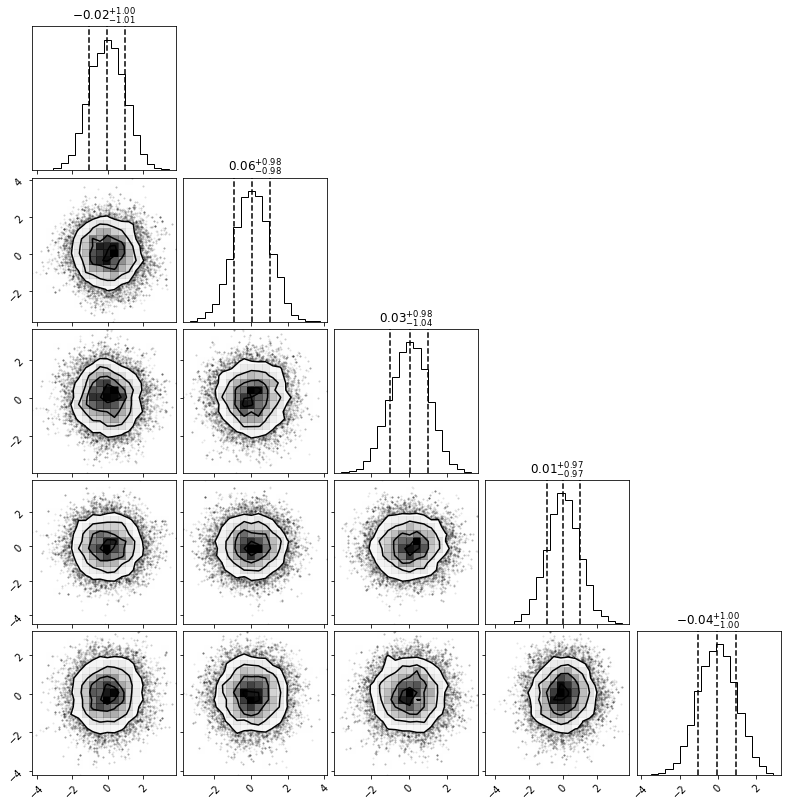

In [15]:
import corner

flat_samples = sampler.get_chain(flat=True, discard=0)
fig = corner.corner(flat_samples, quantiles=[0.16, 0.5, 0.84], show_titles=True)

In [16]:
import multiprocess as mp

with mp.Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, pool=pool)
    start = time.time()
    sampler.run_mcmc(initial, nsteps, progress=True)
    end = time.time()
    multi_time = end - start
    print("Multiprocessing took {0:.1f} seconds".format(multi_time))
    print("{0:.1f} times faster than serial".format(serial_time / multi_time))

100%|██████████| 1000/1000 [01:17<00:00, 12.84it/s]

Multiprocessing took 78.0 seconds
2.7 times faster than serial


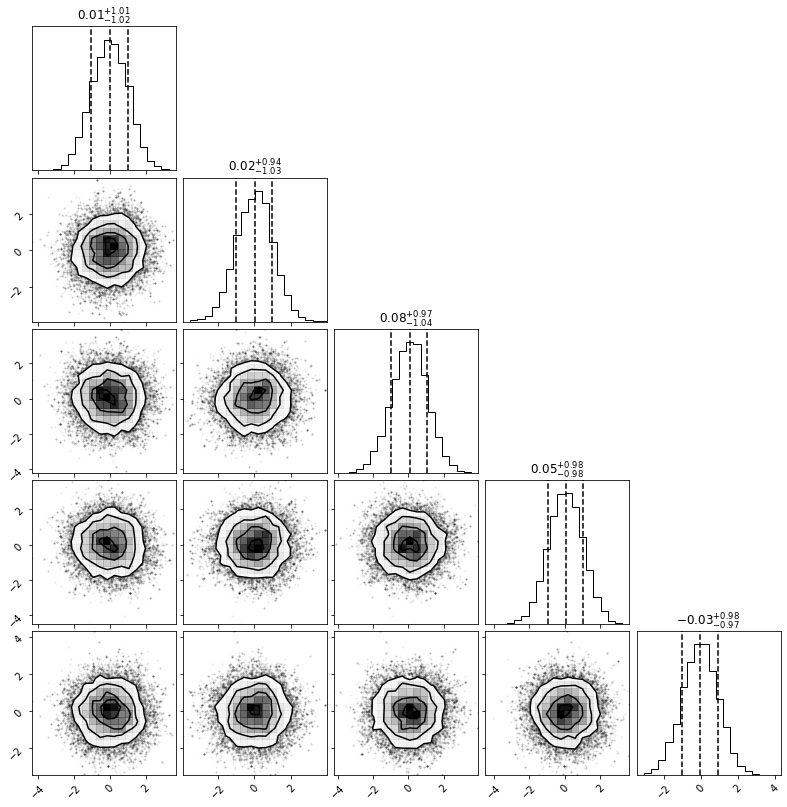

In [17]:
flat_samples = sampler.get_chain(flat=True, discard=0)
fig = corner.corner(flat_samples, quantiles=[0.16, 0.5, 0.84], show_titles=True)